Once deleted, variables cannot be recovered. Proceed (y/[n])? y


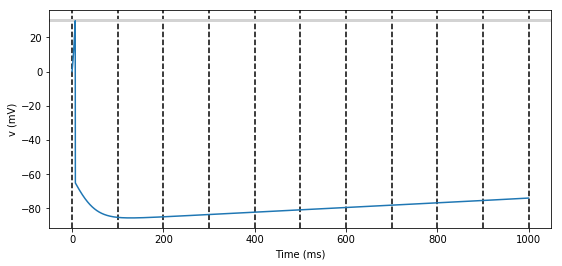

In [14]:
%reset

from brian2 import *
%matplotlib inline
    
start_scope()

tau = 50*ms
eqs = '''
dv/dt = ((0.04*v**2)/mV + 5*v + 140*mV - u + I*ohm)/tau : volt
du/dt = a * (b*v - u)/tau : volt
I : amp
'''
# eqs = '''
# dv/dt = ((0.04*v**2) + 5*v + 140 - u + I)/tau : 1
# du/dt = a * (b*v - u)/tau : 1
# '''

# ws = 10;
# a = 0.05; b = 0.7  # should produce oscillation around 40Hz
a = 0.0275; b = 0.490  # should produce oscillation around 20Hz
# a = 0.025; b = 0.1  # should produce oscillation around 5Hz
I0 = 0; g0 = 0; v0 = -65*mV; u0 = 0; g0 = 1;
I = I0; g = g0; v = v0; u = u0; g = g0;

# TODO: add uniform dist. - bio. plaus.
c = -65*mV; d = 8*mV
# c = -65; d = 8

G = NeuronGroup(1, eqs, threshold='v>=30*mV', reset='''v=c; u=u+d''', method='euler')
# G = NeuronGroup(1, eqs, threshold='v>=30', reset='''v=c; u=u+d''', method='euler')
# TODO: verify with one neuron!

statemon = StateMonitor(G[:], 'v', record=True)
spikemon = SpikeMonitor(G[:], variables='v')

# create function/process where a random neuron is excited by 100 micro-Ampere per ms, and timestep
# G.I = 100
run_time = 1000
run(run_time*ms)


# run(100*ms)
# create spike plots
figure(figsize=(9, 4))
for l in range(11):
    axvline(l*int(run_time/10), ls='--', c='k')
axhline(30, ls='-', c='lightgray', lw=3)
plot(statemon.t/ms, statemon.v.T/mV, '-')
xlabel('Time (ms)')
ylabel('v (mV)');

# output_rates = spikemon.num_spikes/(run_time*ms)
# print("avg. network firing rate: ", output_rates)